In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import types

In [236]:
# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
dataset = pd.read_csv('Life Expectancy.csv')
dataset.head()

,Country,Year,Life_expectancy,GDP_per_capita,GNI,GDP,Urban_population,Rural_population,Military_expenditure,General_government_final_consumption_expenditure,Population_growth,Access_to_electricity,Food_exports,Food_production_index,Households_and_npish_final_consumption_expenditure
0,MAR,2021,74.042,3795.380127,1.409217e+11,1.428663e+11,64.065,35.935,4.183513,2.653235e+10,1.051484,NaN,20.707122,115.66,59.461716
1,MAR,2020,73.920,3258.121338,1.201880e+11,1.213481e+11,63.532,36.468,4.281029,2.356120e+10,1.053160,100.000000,23.089200,98.63,59.061331
2,MAR,2019,74.270,3498.573975,1.269783e+11,1.289199e+11,62.994,37.006,3.099936,2.343627e+10,1.043584,99.599998,21.168753,110.16,59.038131
3,MAR,2018,73.986,3492.673340,1.254254e+11,1.273412e+11,62.453,37.547,3.118588,2.291601e+10,1.117897,98.099998,20.626725,115.69,59.462684
4,MAR,2017,73.660,3288.502197,1.167144e+11,1.185405e+11,61.908,38.092,3.183041,2.131593e+10,1.191629,100.000000,21.126733,108.46,59.320390


In [237]:
filas_especificas = dataset.loc[[253 ,254, 255, 256, 257]]
print(filas_especificas)

    Country  Year  Life_expectancy  GDP_per_capita           GNI  \
253     AFG  1992           47.596             NaN           NaN   
254     AFG  1991           46.663             NaN           NaN   
255     AFG  1990           45.967             NaN           NaN   
256     THA  2021           78.715     7066.190546  4.885460e+11   
257     THA  2020           79.274     6990.935503  4.882077e+11   

              GDP  Urban_population  Rural_population  Military_expenditure  \
253           NaN            21.355            78.645                   NaN   
254           NaN            21.266            78.734                   NaN   
255           NaN            21.177            78.823                   NaN   
256  5.059470e+11            52.163            47.837              1.318443   
257  4.996818e+11            51.430            48.570              1.459520   

     General_government_final_consumption_expenditure  Population_growth  \
253                                     

In [238]:
# Filtrar las filas donde 'Country' es igual a 'AFG' y 'GDP' es nulo
condicion = (dataset['Country'] == 'AFG') & (dataset['GDP'].isnull())
dataset.loc[condicion, 'GDP'] = dataset.loc[243, 'GDP']

In [239]:
# Filtrar las filas donde 'Country' es igual a 'IRN' y 'GDP' es nulo
condicion = (dataset['Country'] == 'IRN') & (dataset['GDP'].isnull())
dataset.loc[condicion, 'GDP'] = dataset.loc[92, 'GDP']

Life_expectancy                                         0
GDP_per_capita                                         14
GNI                                                    21
GDP                                                     0
Urban_population                                        0
Rural_population                                        0
Military_expenditure                                   42
General_government_final_consumption_expenditure       60
Population_growth                                       0
Access_to_electricity                                 112
Food_exports                                          102
Food_production_index                                   5
Households_and_npish_final_consumption_expenditure     58
dtype: int64

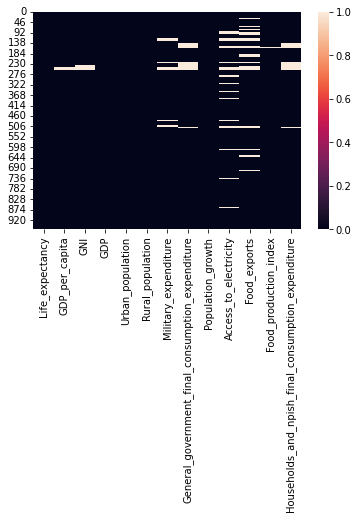

In [240]:
dataset = dataset.drop(['Year','Country'],axis=1)

dataset.head()
sns.heatmap(pd.isnull(dataset))
dataset.isnull().sum()

<AxesSubplot: >

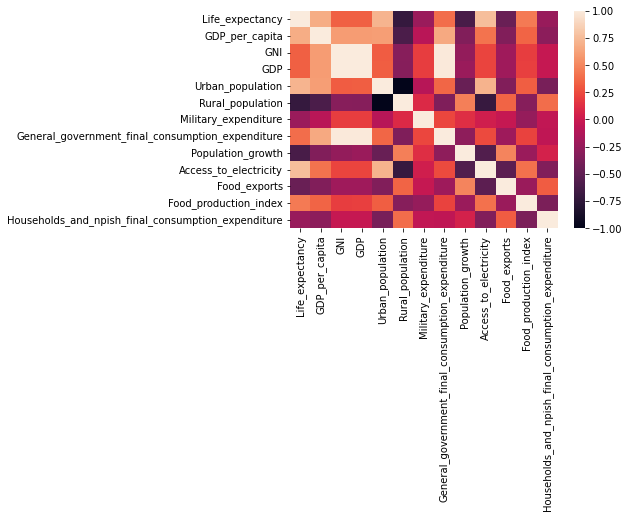

In [241]:
dataset['Life_expectancy']=dataset['Life_expectancy'].fillna(value=dataset['Life_expectancy'].mean())
dataset['GDP_per_capita']=dataset['GDP_per_capita'].fillna(value=dataset['GDP_per_capita'].mean())
corr_data=dataset.corr()
corr_data
sns.heatmap(corr_data)

<AxesSubplot: xlabel='GNI', ylabel='GDP'>

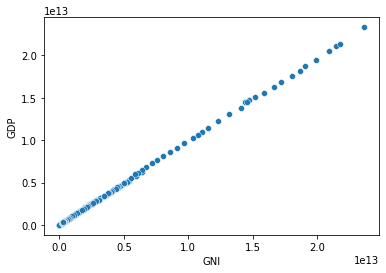

In [242]:
sns.scatterplot(x=dataset['GNI'],y=dataset['GDP'])


In [243]:
# Supongamos que tienes un DataFrame llamado dataset
# con las columnas 'GNI' y 'GDP'

# Utilizar el método fillna() para imputar los valores faltantes en 'GNI' con los valores de 'GDP'
dataset['GNI'].fillna(dataset['GDP'], inplace=True)

<AxesSubplot: xlabel='Access_to_electricity', ylabel='Life_expectancy'>

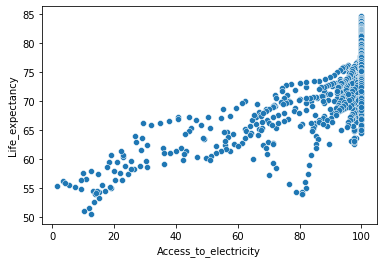

In [244]:
sns.scatterplot(x=dataset['Access_to_electricity'],y=dataset['Life_expectancy'])

In [245]:
def impute_access_to_electricity(c):
    p=c[0]
    l=c[1]
    if pd.isnull(p):
        if l<=59:
            return 19.0
        elif 59<l<=65:
            return 69.0
        elif 65<l<=70:
            return 90.0
        elif l>70:
            return 99.0
    else:
        return p

dataset['Access_to_electricity']=dataset[['Access_to_electricity','Life_expectancy']].apply(impute_access_to_electricity,axis=1)

<AxesSubplot: xlabel='General_government_final_consumption_expenditure', ylabel='GDP'>

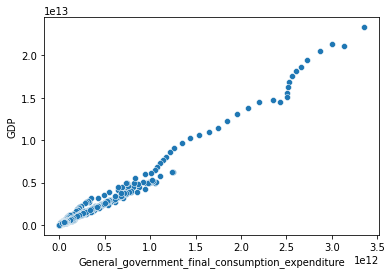

In [246]:
sns.scatterplot(x=dataset['General_government_final_consumption_expenditure'],y=dataset['GDP'])

In [247]:
def impute_Ggfce(c):
    g=c[0]
    p=c[1]
    if pd.isnull(g):
        if p<=0.5:
            return 0.75
        elif 0.5<p<=1.0:
            return 1.25
        elif 1.0<p<=1.5:
            return 1.75
        elif 1.5<p<=2.0:
            return 2.50
        elif p>2.0:
            return 3.0
    else:
        return g

dataset['General_government_final_consumption_expenditure']=dataset[['General_government_final_consumption_expenditure','GDP']].apply(impute_Ggfce,axis=1)

<AxesSubplot: xlabel='Food_exports', ylabel='Population_growth'>

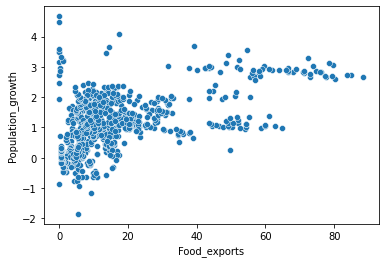

In [248]:
sns.scatterplot(x=dataset['Food_exports'],y=dataset['Population_growth'])

In [249]:
dataset['Food_exports'].fillna(dataset['Population_growth'] * 18.7, inplace=True)

In [250]:
dataset['Food_production_index'].fillna(method='ffill', inplace=True)


<AxesSubplot: xlabel='Military_expenditure', ylabel='GDP'>

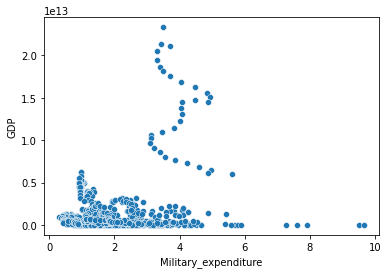

In [251]:
sns.scatterplot(x=dataset['Military_expenditure'],y=dataset['GDP'])

In [252]:
dataset['Military_expenditure'].fillna(method='ffill', inplace=True)

In [253]:
dataset['Households_and_npish_final_consumption_expenditure'].fillna(method='ffill', inplace=True)

*18.7

In [254]:
a=list(dataset.columns)
b=[]
for i in a:
    c=dataset[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Life_expectancy,0
1,GDP_per_capita,0
2,GNI,0
3,GDP,0
4,Urban_population,0
5,Rural_population,0
6,Military_expenditure,0
7,General_government_final_consumption_expenditure,0
8,Population_growth,0
9,Access_to_electricity,0


In [255]:
y=dataset['Life_expectancy']
X=dataset.drop('Life_expectancy',axis=1)

In [256]:
X.shape

(960, 12)

In [257]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [258]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [259]:
# Predicting a new result
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
y_pred = np.array(y_pred)
y_test = np.array(y_test)

print(np.concatenate((y_pred.reshape(len(y_test),1), y_test.reshape(len(y_test),1)),1))

[[57.47 60.72]
 [74.71 75.11]
 [64.24 61.43]
 [62.32 62.48]
 [71.38 71.36]
 [67.78 65.96]
 [72.66 72.84]
 [78.02 76.98]
 [66.28 66.15]
 [64.1  65.67]
 [80.49 79.84]
 [78.01 77.73]
 [74.32 74.19]
 [78.86 78.82]
 [70.08 70.42]
 [74.06 73.93]
 [58.9  58.44]
 [80.17 78.96]
 [67.16 65.98]
 [71.44 72.54]
 [77.07 75.82]
 [64.81 64.15]
 [82.14 81.63]
 [76.65 76.13]
 [77.83 77.48]
 [63.53 63.02]
 [67.64 66.74]
 [79.83 79.87]
 [76.39 75.89]
 [79.28 79.4 ]
 [49.45 49.93]
 [62.12 62.91]
 [82.36 81.96]
 [76.37 76.03]
 [70.64 72.99]
 [68.03 70.75]
 [66.17 66.82]
 [67.82 65.53]
 [68.94 70.12]
 [81.05 80.9 ]
 [63.79 62.58]
 [78.67 80.23]
 [71.44 71.65]
 [78.58 78.22]
 [63.37 63.38]
 [72.53 70.07]
 [77.37 78.72]
 [67.24 67.4 ]
 [66.41 67.23]
 [77.51 77.49]
 [75.98 76.14]
 [82.81 83.35]
 [81.33 81.1 ]
 [70.87 72.12]
 [54.78 54.53]
 [71.43 72.46]
 [76.94 76.58]
 [78.58 78.12]
 [78.66 78.52]
 [56.28 58.36]
 [73.39 73.41]
 [68.43 68.84]
 [73.41 70.21]
 [74.38 74.33]
 [81.23 81.29]
 [72.25 72.92]
 [78.09 78

In [260]:
accuracy_score =  regressor.score(X_test,y_test)
print(accuracy_score)

0.9731343427607309


In [261]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(regressor,X_train,y_train,cv=10)
accuracies.mean()

0.9715352502804586

In [262]:
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(regressor, file)

In [263]:
# Cargamos el modelo
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    regressor = pickle.load(file)

In [264]:
# Encontramos el accuracy promedio usando datos de test
score = regressor.score(X_test, y_test)
print(score)

0.9731343427607309
